 # Power Load Prediction for West Zone - EDA (24 hrs)

In [93]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [94]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_79681/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [95]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [96]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [97]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [98]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [99]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [100]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [101]:
power_data_west['day_of_week'] = power_data_west['end'].dt.day_name()

In [102]:
power_data_west['day_of_week_int'] = power_data_west['end'].dt.day_of_week

In [103]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['end'].dt.date.astype('datetime64').isin(holidays)

In [104]:
power_data_west["holiday_int"] = power_data_west["holiday"].astype(int)

In [105]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity', 'month_int', 'day_of_week_int', 'holiday_int']].copy() 

In [106]:
power_data_west_mod.head()

,end,demand,temp,humidity,month_int,day_of_week_int,holiday_int
0,2019-01-29 00:15:00,844.8,54.0,21,1,1,0
1,2019-01-29 00:30:00,841.6,54.0,21,1,1,0
2,2019-01-29 00:45:00,832.0,54.0,21,1,1,0
3,2019-01-29 01:00:00,848.0,54.0,21,1,1,0
4,2019-01-29 01:15:00,812.8,55.0,21,1,1,0


In [107]:
power_data_west_mod.describe()

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
count,104596.000000,104588.00000,104608.000000,104608.00000,104608.000000,104608.000000
mean,1238.634456,67.39232,52.635401,6.54298,2.998748,0.028449
std,302.399419,16.59371,22.815913,3.43464,2.002753,0.166253
min,0.000000,29.00000,3.000000,1.00000,0.000000,0.000000
25%,1008.000000,54.00000,34.000000,4.00000,1.000000,0.000000
50%,1232.000000,66.00000,49.000000,7.00000,3.000000,0.000000
75%,1472.000000,79.00000,70.000000,10.00000,5.000000,0.000000
max,2124.800000,114.00000,100.000000,12.00000,6.000000,1.000000


In [108]:
power_data_west_mod.shape

(104608, 7)

In [109]:
power_data_west_24 = power_data_west_mod.resample('D', on='end').agg({'demand':'sum', 'temp':'max', 'humidity':'max', 'month_int':'max', 'day_of_week_int':'max', 'holiday_int':'max'})

In [110]:
power_data_west_24.describe()

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,118532.671171,79.911253,70.422690,6.537054,2.998170,0.028362
std,28166.774387,16.415071,19.585791,3.443121,2.000915,0.166082
min,1155.200000,44.000000,12.000000,1.000000,0.000000,0.000000
25%,96940.800000,66.000000,55.000000,4.000000,1.000000,0.000000
50%,117507.200000,79.000000,70.000000,7.000000,3.000000,0.000000
75%,141232.000000,95.000000,90.000000,10.000000,5.000000,0.000000
max,190041.600000,114.000000,100.000000,12.000000,6.000000,1.000000


In [111]:
power_data_west_mod.replace( np.nan, 0, inplace=True)

In [112]:
power_data_west_24

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
end,,,,,,
2019-01-29,87331.2,65.0,88,1,1,0
2019-01-30,94944.0,71.0,89,1,2,0
2019-01-31,94940.8,60.0,92,1,3,0
2019-02-01,92905.6,63.0,79,2,4,0
2019-02-02,87206.4,66.0,93,2,5,0
...,...,...,...,...,...,...
2022-01-21,114214.4,60.0,92,1,4,0
2022-01-22,88096.0,66.0,91,1,5,0
2022-01-23,83523.2,68.0,61,1,6,0


dataset.kW.plot()

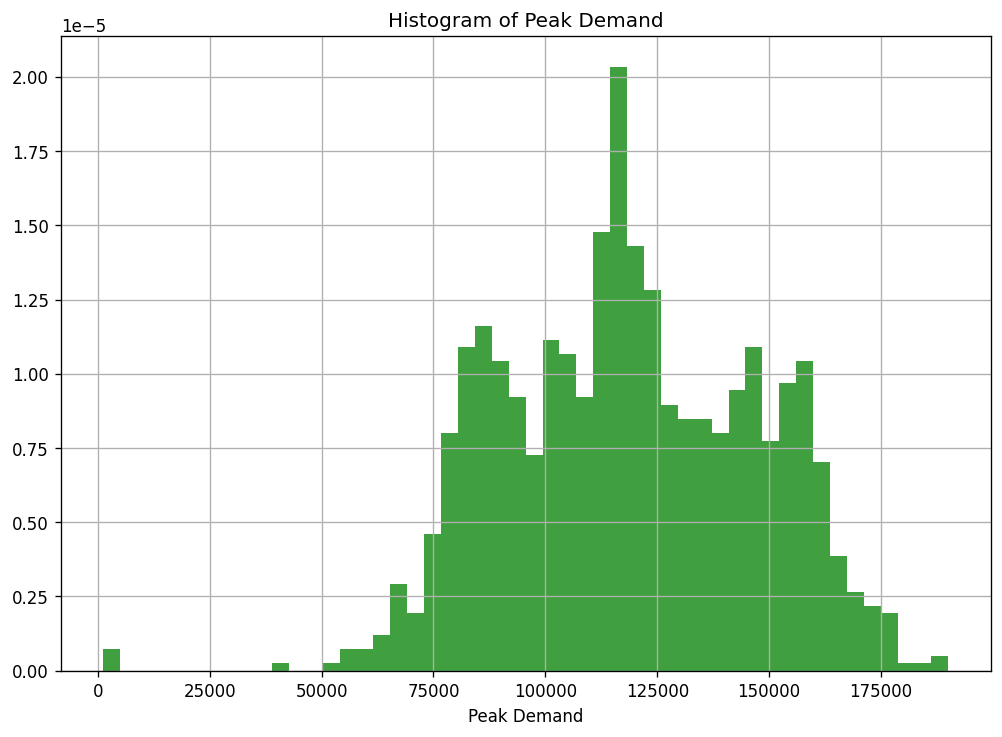

In [113]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_24['demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

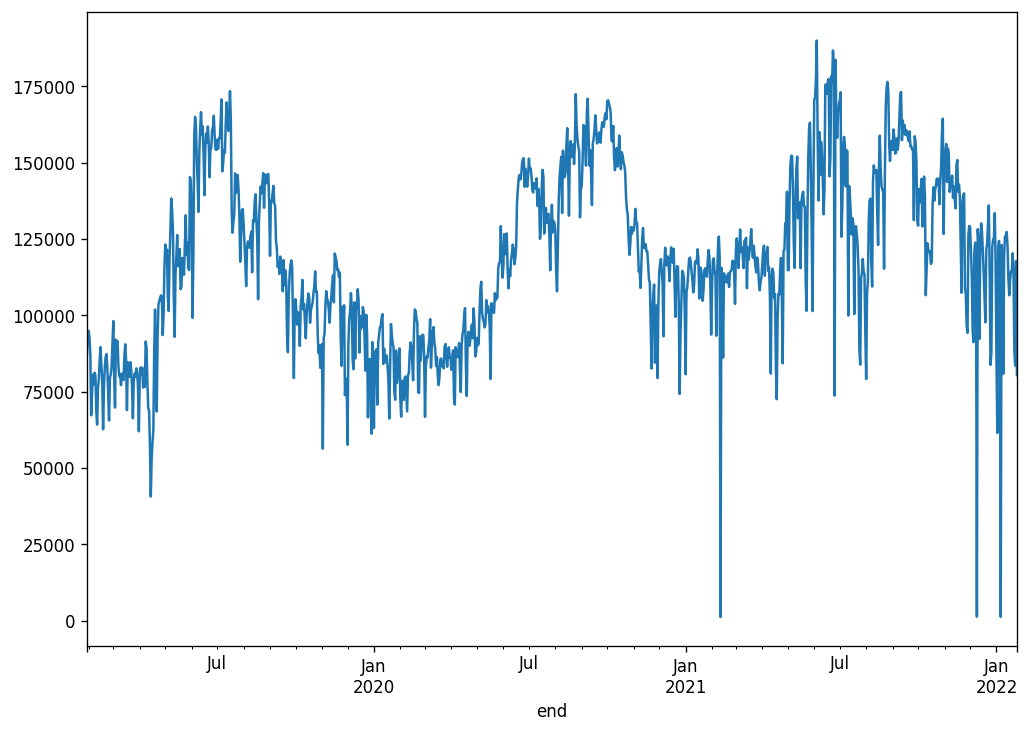

In [114]:
power_data_west_24['demand'].plot()

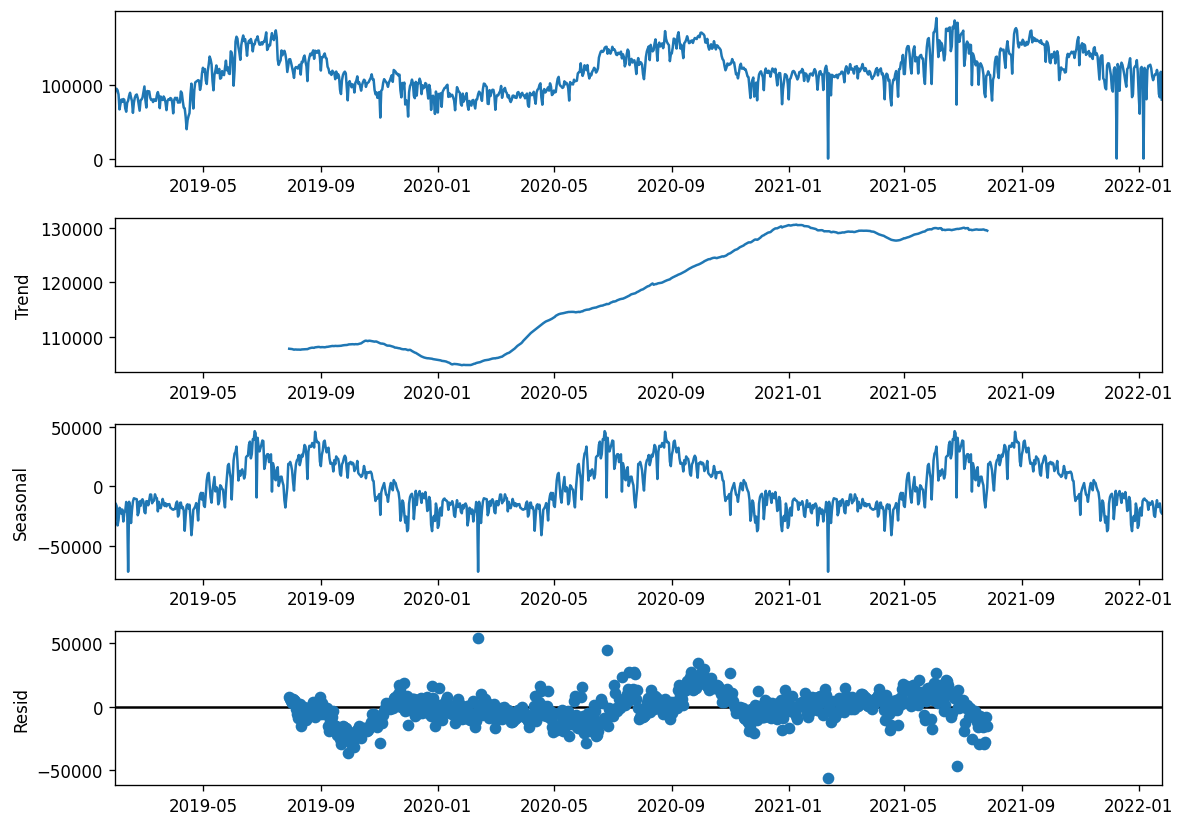

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(power_data_west_24, columns=['demand'])
result = seasonal_decompose(series, model='additive', period=365)
result.plot()
plt.show()

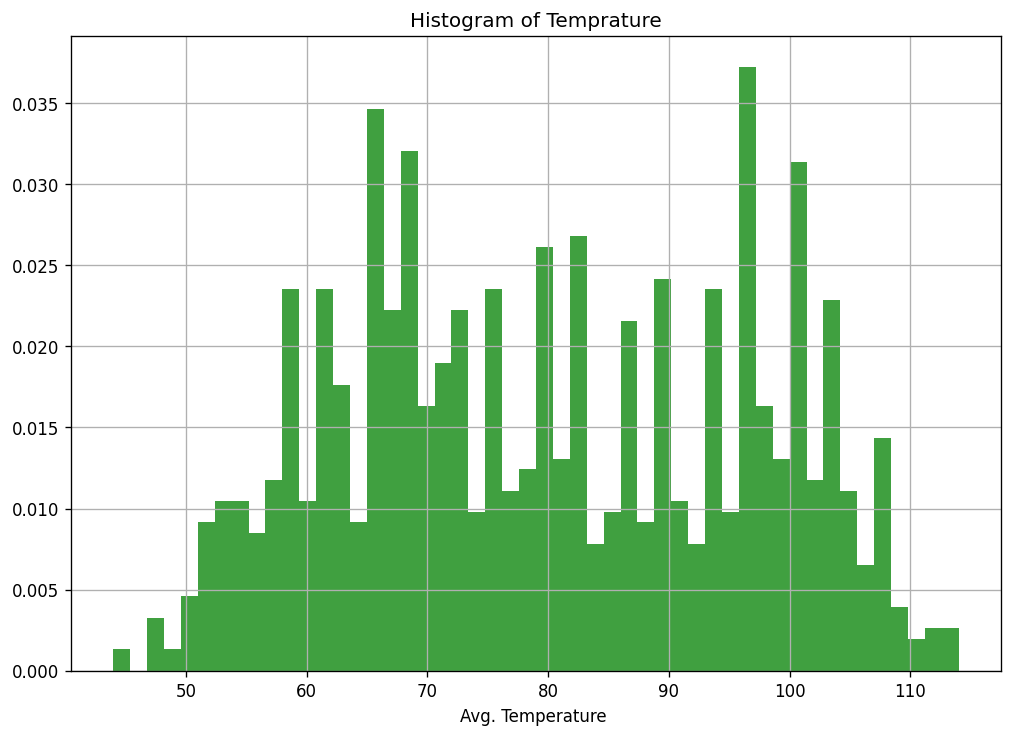

In [115]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_24['temp'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Avg. Temperature ')
plt.title('Histogram of Temprature')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

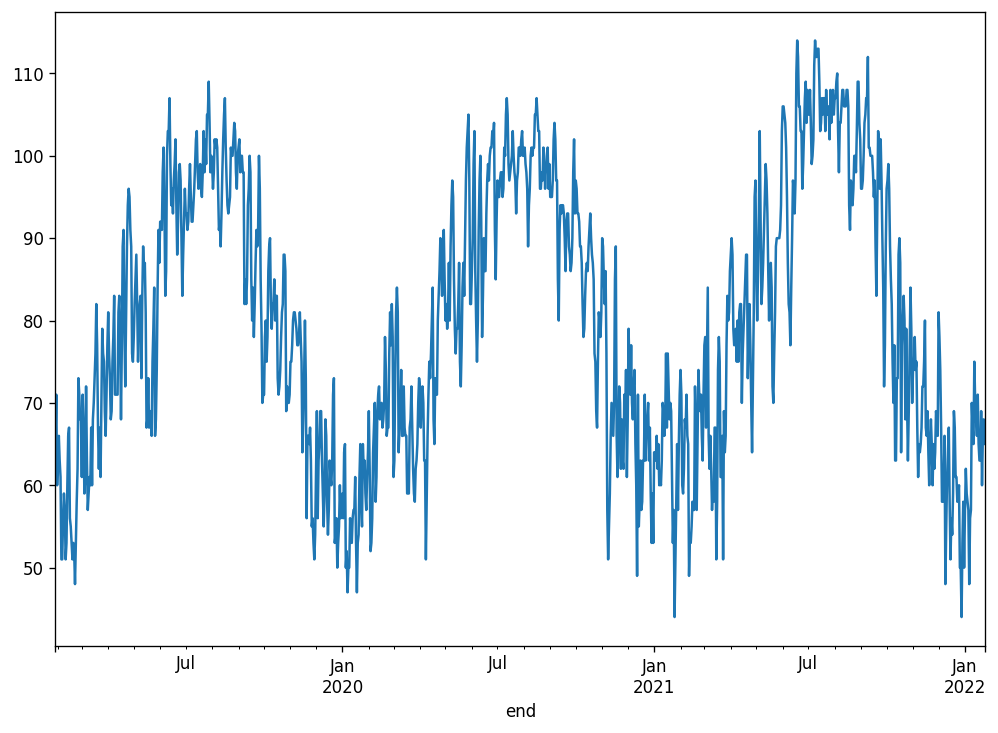

In [116]:
power_data_west_24['temp'].plot()

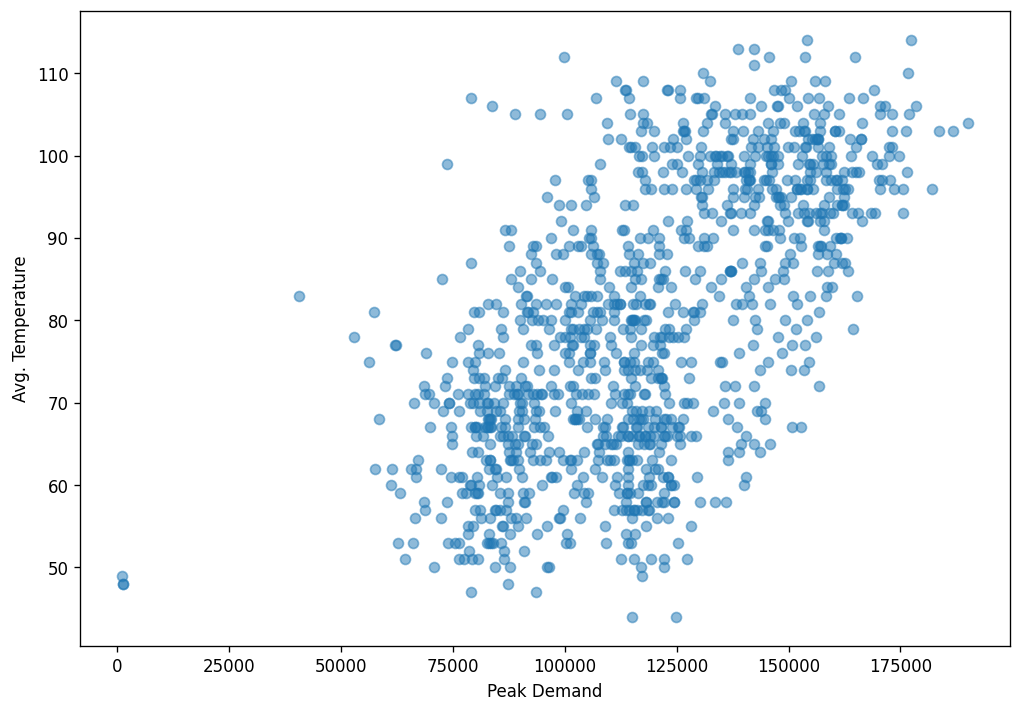

In [117]:
plt.scatter(power_data_west_24['demand'], power_data_west_24['temp'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

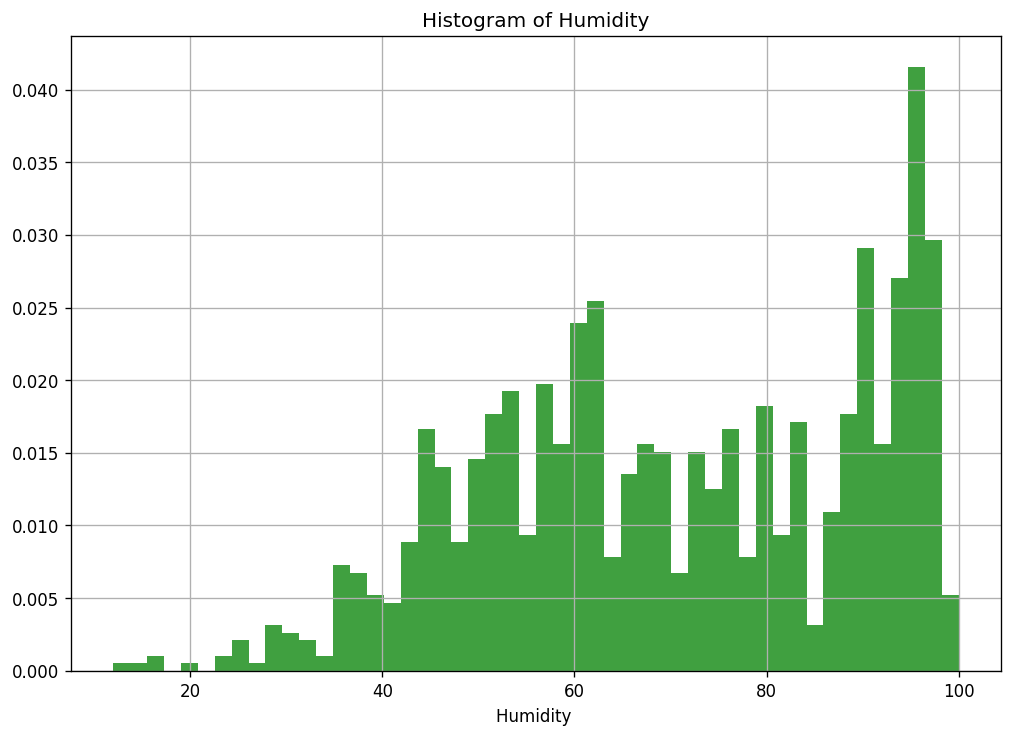

In [120]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_24['humidity'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Humidity ')
plt.title('Histogram of Humidity')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

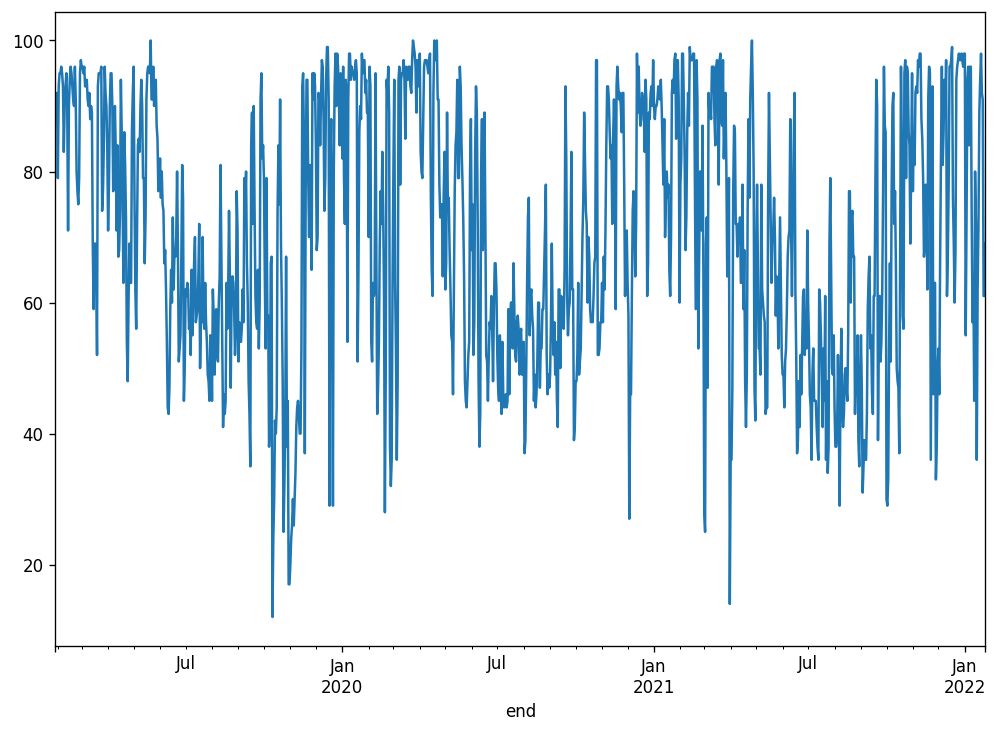

In [121]:
power_data_west_24['humidity'].plot()

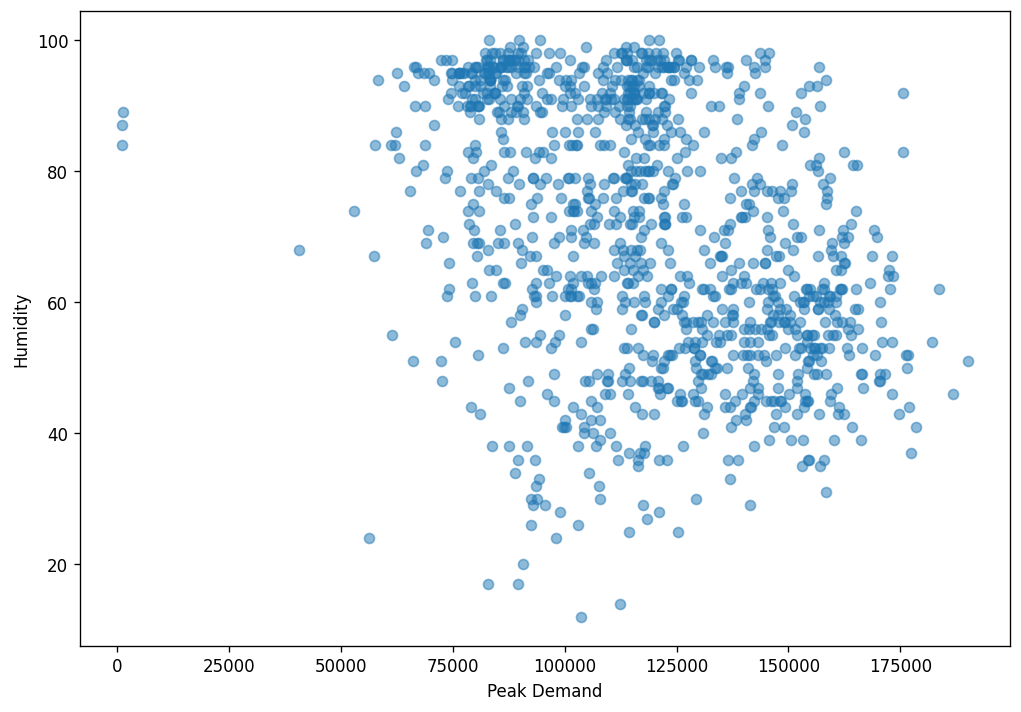

In [122]:
plt.scatter(power_data_west_24['demand'], power_data_west_24['humidity'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Humidity")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_int', ylabel='demand'>

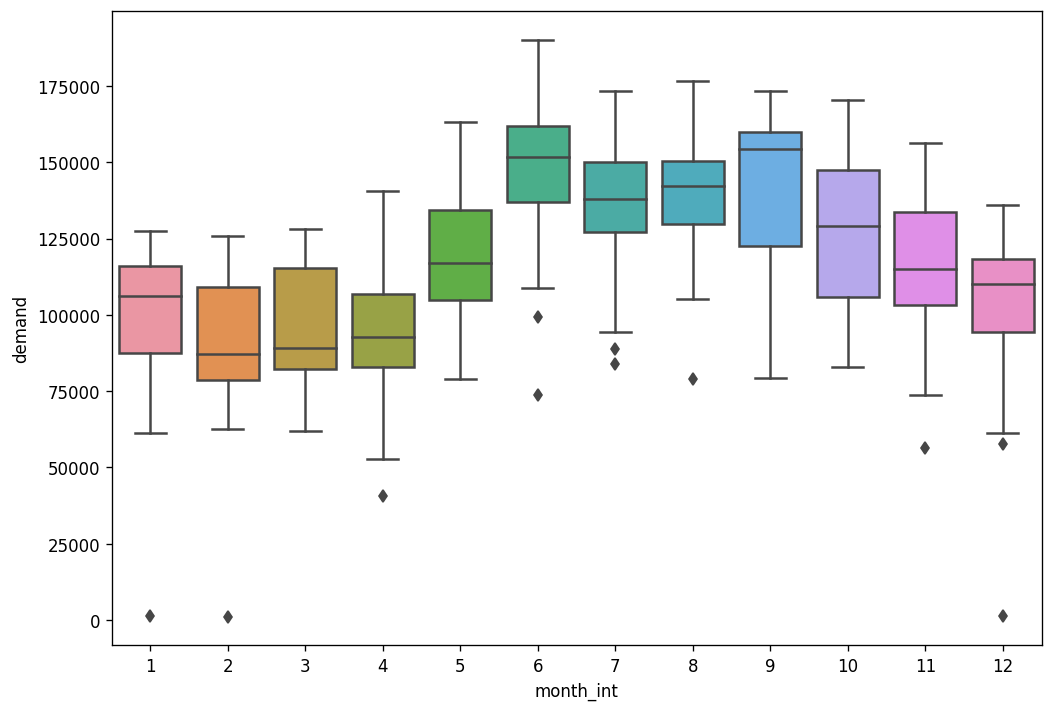

In [90]:
from seaborn import boxplot

boxplot(power_data_west_24['month_int'], power_data_west_24['demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week_int', ylabel='demand'>

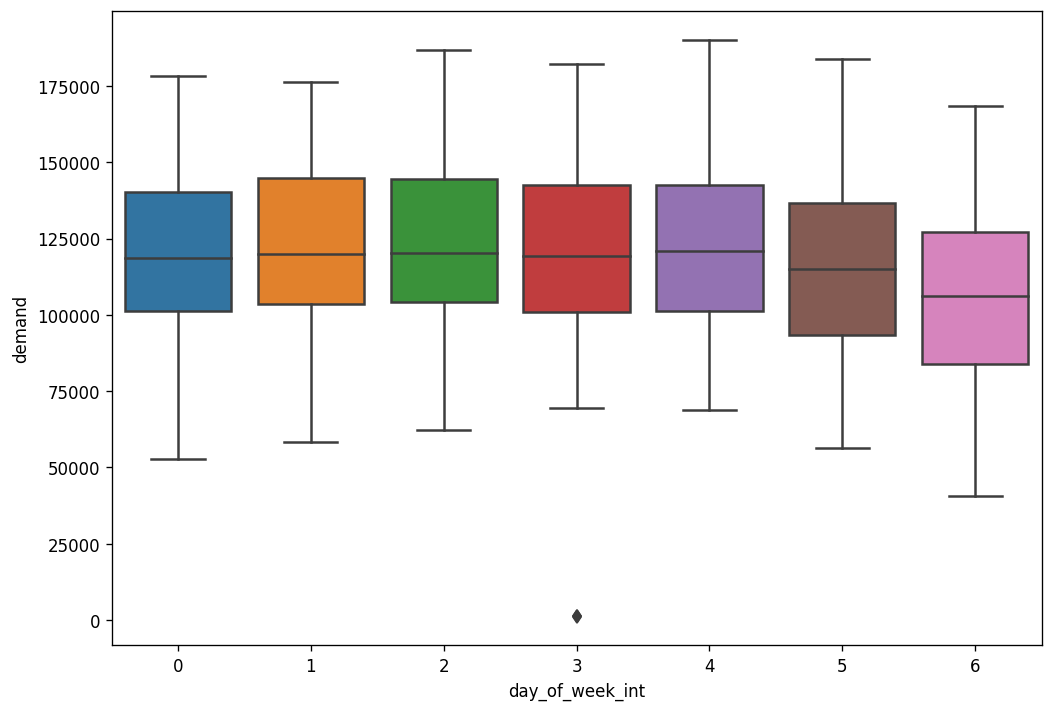

In [91]:
boxplot(power_data_west_24['day_of_week_int'], power_data_west_24['demand'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday_int', ylabel='demand'>

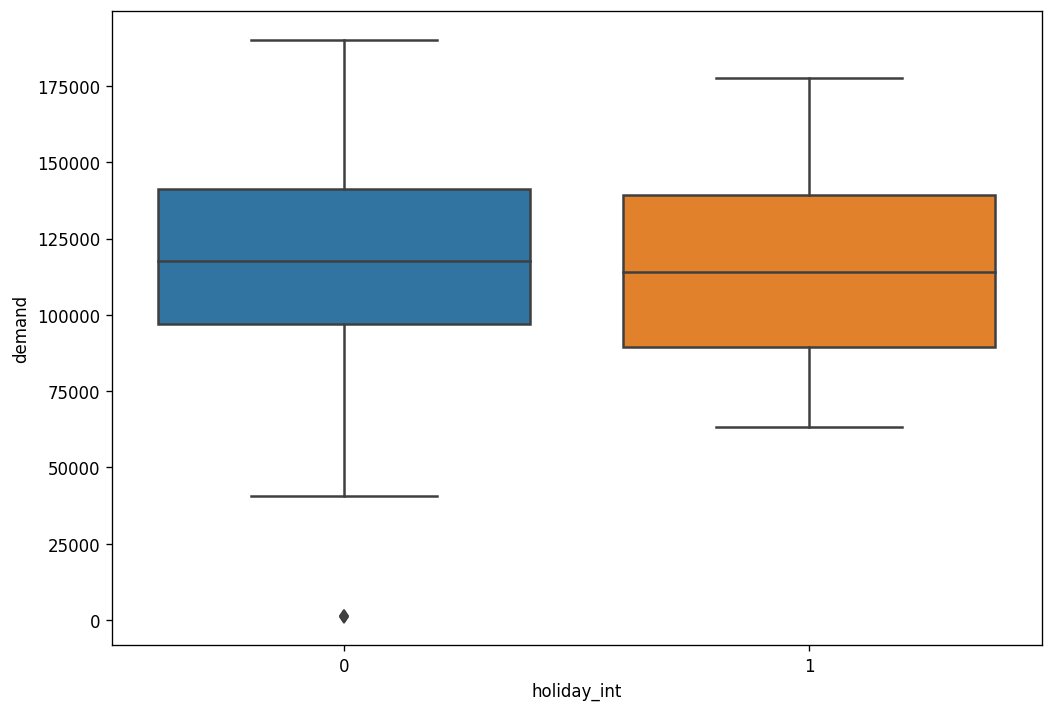

In [92]:
boxplot(power_data_west_24['holiday_int'], power_data_west_24['demand'])